In [14]:
import pandas as pd
import numpy as np 
import spei as si

def evaporasi(Tn, Tx, Ta, lat):
    dif = Tx - Tn
    dif = np.where(dif < 0, 0, dif)
    j = pd.to_datetime('today').dayofyear
    dr = 1 + 0.033 * np.cos(2 * np.pi / 365 * j)
    delta = 0.409 * np.sin(2 * np.pi * j / 365 - 1.39)
    phi_rad = np.deg2rad(lat)
    omega_s = np.arccos(-1 * (np.tan(phi_rad) * np.tan(delta)))
    bracket = omega_s * np.sin(phi_rad) * np.sin(delta) + np.sin(omega_s) * np.cos(phi_rad) * np.cos(delta)
    R_a = 1440 * 0.0820 / np.pi * dr * bracket
    ET = 0.0023 * R_a * (Ta + 17.8) * np.sqrt(dif)
    evap = ET / (2.45 * 1000)    
    
    return evap

def hitung_spei(item, f):
    pe = (item['RR'] - item['Evaporasi']).dropna()
    spei = si.spei(pe.rolling(f, min_periods=f).sum().dropna())
    item[f'SPEI'] = spei
    item[f'Kategori'] = pd.cut(item[f'SPEI'], bins=[-np.inf, -2, -1.5, -1, -0.5, np.inf], labels=['D4', 'D3', 'D2', 'D1', 'D0'])
    return item

## **1. Train**
Periode : **2000 s/d 2009**

In [15]:
df_1 = pd.read_csv('data/train/apt-pranoto.csv', sep=";")
df_1['Tanggal'] = pd.to_datetime(df_1['Tanggal'], format='%d-%m-%Y', errors='coerce')
df_1['Lat'] =  -0.4800
df_1['Long'] =  117.16000
df_1['El'] =  10
df_1['Stasiun'] = 96607

df_1.insert(0, 'Stasiun', df_1.pop('Stasiun'))

df_1.set_index('Tanggal', inplace=True)

# PET
# =======
df_1['Evaporasi'] = df_1.apply(lambda row: evaporasi(row['Tn'], row['Tx'], row['Tavg'], row['Lat']), axis=1)

# SPEI
# =======
df_1 = hitung_spei(df_1, 1)

# ============
df_1 = df_1.dropna()

print('Jumlah Data: ' + str(len(df_1)))
df_1.tail()

Jumlah Data: 3220


,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Lat,Long,El,Evaporasi,SPEI,Kategori
Tanggal,,,,,,,,,,,,,,,,,
2009-12-27,96607,25.0,31.2,27.2,90.0,6.5,0.2,4.0,315.0,1.0,NW,-0.48,117.16,10,0.003492,0.225700,D0
2009-12-28,96607,25.0,32.2,27.7,83.0,0.0,1.0,3.0,270.0,1.0,NE,-0.48,117.16,10,0.003805,-1.452337,D2
2009-12-29,96607,24.0,30.8,27.5,83.0,6.9,1.4,15.0,180.0,1.0,NW,-0.48,117.16,10,0.003681,0.238265,D0
2009-12-30,96607,25.0,34.7,28.0,82.0,5.5,5.3,6.0,360.0,1.0,W,-0.48,117.16,10,0.004445,0.190450,D0
2009-12-31,96607,24.0,33.0,27.9,82.0,0.0,0.0,4.0,270.0,2.0,W,-0.48,117.16,10,0.004272,-1.529911,D3


In [16]:
df_2 = pd.read_csv('data/train/kalimarau.csv', sep=";")
df_2['Tanggal'] = pd.to_datetime(df_2['Tanggal'], format='%d-%m-%Y', errors='coerce')
df_2['Lat'] =   2.14562
df_2['Long'] =   117.43375	
df_2['El'] =  13
df_2['Stasiun'] = 96529

df_2.insert(0, 'Stasiun', df_2.pop('Stasiun'))

df_2.set_index('Tanggal', inplace=True)

# PET
# =======
df_2['Evaporasi'] = df_2.apply(lambda row: evaporasi(row['Tn'], row['Tx'], row['Tavg'], row['Lat']), axis=1)

# SPEI
# =======
# df_2 = hitung_spei(df_2, 1)

# ============
df_2 = df_2.dropna()

print('Jumlah Data: ' + str(len(df_2)))
df_2.tail()

Jumlah Data: 0


,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Lat,Long,El,Evaporasi
Tanggal,,,,,,,,,,,,,,,


In [17]:
df_3 = pd.read_csv('data/train/sepinggan.csv', sep=";")
df_3['Tanggal'] = pd.to_datetime(df_3['Tanggal'], format='%d-%m-%Y', errors='coerce')
df_3['Lat'] =   -1.26000
df_3['Long'] =  116.90000
df_3['El'] =  3
df_3['Stasiun'] = 96633

df_3.insert(0, 'Stasiun', df_3.pop('Stasiun'))
df_3.set_index('Tanggal', inplace=True)

# PET
# =======
df_3['Evaporasi'] = df_3.apply(lambda row: evaporasi(row['Tn'], row['Tx'], row['Tavg'], row['Lat']), axis=1)

# SPEI
# =======
df_3 = hitung_spei(df_3, 1)

# ============
df_3 = df_3.dropna()

print('Jumlah Data: ' + str(len(df_3)))
df_3.tail()

Jumlah Data: 3589


,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Lat,Long,El,Evaporasi,SPEI,Kategori
Tanggal,,,,,,,,,,,,,,,,,
2009-12-26,96633,25,33.6,27.9,88,5.1,4.8,4,140,1.0,SE,-1.26,116.9,3,0.004137,0.156759,D0
2009-12-27,96633,25,29.4,26.1,95,0.0,0.0,5,270,2.0,N,-1.26,116.9,3,0.002842,-1.339022,D2
2009-12-28,96633,24,31.0,26.5,89,8.0,0.2,4,150,2.0,N,-1.26,116.9,3,0.003618,0.245790,D0
2009-12-29,96633,25,31.8,25.7,93,0.0,0.3,7,360,2.0,N,-1.26,116.9,3,0.003501,-1.423260,D2
2009-12-31,96633,24,28.6,26.3,96,21.0,4.7,3,340,2.0,N,-1.26,116.9,3,0.002920,0.434630,D0


In [18]:
df = pd.concat([df_1, df_2, df_3])

print('Jumlah Data: ' + str(len(df)))
df.tail()

Jumlah Data: 6809


,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Lat,Long,El,Evaporasi,SPEI,Kategori
Tanggal,,,,,,,,,,,,,,,,,
2009-12-26,96633,25.0,33.6,27.9,88.0,5.1,4.8,4.0,140.0,1.0,SE,-1.26,116.9,3,0.004137,0.156759,D0
2009-12-27,96633,25.0,29.4,26.1,95.0,0.0,0.0,5.0,270.0,2.0,N,-1.26,116.9,3,0.002842,-1.339022,D2
2009-12-28,96633,24.0,31.0,26.5,89.0,8.0,0.2,4.0,150.0,2.0,N,-1.26,116.9,3,0.003618,0.245790,D0
2009-12-29,96633,25.0,31.8,25.7,93.0,0.0,0.3,7.0,360.0,2.0,N,-1.26,116.9,3,0.003501,-1.423260,D2
2009-12-31,96633,24.0,28.6,26.3,96.0,21.0,4.7,3.0,340.0,2.0,N,-1.26,116.9,3,0.002920,0.434630,D0


In [19]:
df.to_csv('data/train/combine.csv')

## **2. Test**
Periode : **2010 s/d 2011**

In [20]:
df_4 = pd.read_csv('data/test/apt-pranoto.csv', sep=";")
df_4['Tanggal'] = pd.to_datetime(df_4['Tanggal'], format='%d-%m-%Y', errors='coerce')
df_4['Lat'] =  -0.4800
df_4['Long'] =  117.16000
df_4['El'] =  10
df_4['Stasiun'] = 96607

df_4.insert(0, 'Stasiun', df_4.pop('Stasiun'))

df_4.set_index('Tanggal', inplace=True)

# PET
# =======
df_4['Evaporasi'] = df_4.apply(lambda row: evaporasi(row['Tn'], row['Tx'], row['Tavg'], row['Lat']), axis=1)

# SPEI
# =======
df_4 = hitung_spei(df_4, 1)

# ============
df_4 = df_4.dropna()

print('Jumlah Data: ' + str(len(df_4)))
df_4.tail()

Jumlah Data: 2313


,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Lat,Long,El,Evaporasi,SPEI,Kategori
Tanggal,,,,,,,,,,,,,,,,,
2020-12-25,96607,24.2,28.4,26.0,89.0,4.8,1.7,3.0,310.0,1.0,W,-0.48,117.16,10,0.002797,-0.147785,D0
2020-12-26,96607,23.0,31.0,26.6,88.0,1.5,0.0,3.0,190.0,2.0,W,-0.48,117.16,10,0.003914,-0.338517,D0
2020-12-27,96607,24.0,33.4,27.2,86.0,8.0,0.8,3.0,300.0,2.0,SW,-0.48,117.16,10,0.004299,-0.063487,D0
2020-12-28,96607,23.0,31.0,27.2,86.0,2.0,5.3,3.0,270.0,1.0,C,-0.48,117.16,10,0.003966,-0.291603,D0
2020-12-31,96607,23.0,32.2,26.6,84.0,13.0,5.0,4.0,200.0,2.0,NW,-0.48,117.16,10,0.004197,0.016803,D0


In [21]:
df_5 = pd.read_csv('data/test/kalimarau.csv', sep=";")
df_5['Tanggal'] = pd.to_datetime(df_5['Tanggal'], format='%d-%m-%Y', errors='coerce')
df_5['Lat'] =   2.14562
df_5['Long'] =   117.43375	
df_5['El'] =  13
df_5['Stasiun'] = 96529

df_5.insert(0, 'Stasiun', df_5.pop('Stasiun'))

df_5.set_index('Tanggal', inplace=True)

# PET
# =======
df_5['Evaporasi'] = df_5.apply(lambda row: evaporasi(row['Tn'], row['Tx'], row['Tavg'], row['Lat']), axis=1)

# SPEI
# =======
df_5 = hitung_spei(df_5, 1)

# ============
df_5 = df_5.dropna()

print('Jumlah Data: ' + str(len(df_5)))
df_5.tail()

Jumlah Data: 2249


,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Lat,Long,El,Evaporasi,SPEI,Kategori
Tanggal,,,,,,,,,,,,,,,,,
2020-12-26,96529,23.0,31.0,26.7,92.0,1.1,2.0,3.0,320.0,1.0,C,2.14562,117.43375,13,0.004043,-0.276581,D0
2020-12-28,96529,23.7,31.3,26.3,94.0,1.0,4.0,2.0,200.0,1.0,C,2.14562,117.43375,13,0.003905,-0.297864,D0
2020-12-29,96529,23.6,33.0,27.4,90.0,0.0,0.0,3.0,290.0,1.0,C,2.14562,117.43375,13,0.004452,-1.726713,D3
2020-12-30,96529,23.7,29.4,25.4,100.0,0.0,5.5,4.0,10.0,1.0,C,2.14562,117.43375,13,0.003313,-1.559495,D3
2020-12-31,96529,23.6,30.6,25.5,96.0,7.3,0.0,3.0,70.0,1.0,C,2.14562,117.43375,13,0.003680,0.150559,D0


In [22]:
df_6 = pd.read_csv('data/test/sepinggan.csv', sep=";")
df_6['Tanggal'] = pd.to_datetime(df_6['Tanggal'], format='%d-%m-%Y', errors='coerce')
df_6['Lat'] =   -1.26000
df_6['Long'] =  116.90000
df_6['El'] =  3
df_6['Stasiun'] = 96633

df_6.insert(0, 'Stasiun', df_6.pop('Stasiun'))
df_6.set_index('Tanggal', inplace=True)

# PET
# =======
df_6['Evaporasi'] = df_6.apply(lambda row: evaporasi(row['Tn'], row['Tx'], row['Tavg'], row['Lat']), axis=1)

# SPEI
# =======
df_6 = hitung_spei(df_6, 1)

# ============
df_6 = df_6.dropna()

print('Jumlah Data: ' + str(len(df_6)))
df_6.tail()

Jumlah Data: 2991


,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Lat,Long,El,Evaporasi,SPEI,Kategori
Tanggal,,,,,,,,,,,,,,,,,
2020-12-21,96633,24.8,31.1,27.8,90.0,3.7,1.0,5.0,210.0,2.0,SW,-1.26,116.9,3,0.003533,0.289738,D0
2020-12-24,96633,24.8,30.7,26.9,85.0,5.7,1.7,7.0,260.0,2.0,W,-1.26,116.9,3,0.003351,0.379628,D0
2020-12-25,96633,24.7,30.2,27.1,84.0,0.0,1.9,3.0,250.0,1.0,C,-1.26,116.9,3,0.003250,-1.304603,D2
2020-12-29,96633,24.0,31.0,27.3,86.0,1.1,1.0,4.0,240.0,2.0,S,-1.26,116.9,3,0.003683,0.034694,D0
2020-12-30,96633,25.0,30.1,27.4,86.0,0.0,0.7,6.0,220.0,2.0,W,-1.26,116.9,3,0.003151,-1.290964,D2


In [23]:
df1 = pd.concat([df_4, df_5, df_6])

print('Jumlah Data: ' + str(len(df1)))
df1.tail()

Jumlah Data: 7553


,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Lat,Long,El,Evaporasi,SPEI,Kategori
Tanggal,,,,,,,,,,,,,,,,,
2020-12-21,96633,24.8,31.1,27.8,90.0,3.7,1.0,5.0,210.0,2.0,SW,-1.26,116.9,3,0.003533,0.289738,D0
2020-12-24,96633,24.8,30.7,26.9,85.0,5.7,1.7,7.0,260.0,2.0,W,-1.26,116.9,3,0.003351,0.379628,D0
2020-12-25,96633,24.7,30.2,27.1,84.0,0.0,1.9,3.0,250.0,1.0,C,-1.26,116.9,3,0.003250,-1.304603,D2
2020-12-29,96633,24.0,31.0,27.3,86.0,1.1,1.0,4.0,240.0,2.0,S,-1.26,116.9,3,0.003683,0.034694,D0
2020-12-30,96633,25.0,30.1,27.4,86.0,0.0,0.7,6.0,220.0,2.0,W,-1.26,116.9,3,0.003151,-1.290964,D2


In [24]:
df1.to_csv('data/test/combine.csv')

## **3. Validation**
Periode : **2012 s/d 2020**

In [25]:
df_7 = pd.read_csv('data/validation/apt-pranoto.csv', sep=";")
df_7['Tanggal'] = pd.to_datetime(df_7['Tanggal'], format='%d-%m-%Y', errors='coerce')
df_7['Lat'] =  -0.4800
df_7['Long'] =  117.16000
df_7['El'] =  10
df_7['Stasiun'] = 96607

df_7.insert(0, 'Stasiun', df_7.pop('Stasiun'))

df_7.set_index('Tanggal', inplace=True)

# PET
# =======
df_7['Evaporasi'] = df_7.apply(lambda row: evaporasi(row['Tn'], row['Tx'], row['Tavg'], row['Lat']), axis=1)

# SPEI
# =======
df_7 = hitung_spei(df_7, 1)

# ============
df_7 = df_7.dropna()

print('Jumlah Data: ' + str(len(df_7)))
df_7.tail()

Jumlah Data: 729


,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Lat,Long,El,Evaporasi,SPEI,Kategori
Tanggal,,,,,,,,,,,,,,,,,
2011-12-27,96607,25,32.0,27.7,85,11.0,2.0,4,270,2,W,-0.48,117.16,10,0.003751,0.189641,D0
2011-12-28,96607,23,31.8,27.3,87,27.6,1.2,4,225,2,W,-0.48,117.16,10,0.004169,0.385334,D0
2011-12-29,96607,24,30.2,26.8,83,0.0,0.2,3,270,1,W,-0.48,117.16,10,0.003461,-1.601306,D3
2011-12-30,96607,25,32.6,27.7,82,1.2,2.3,3,270,2,W,-0.48,117.16,10,0.003909,-0.285752,D0
2011-12-31,96607,25,34.2,27.8,83,0.0,2.0,4,270,2,N,-0.48,117.16,10,0.004310,-1.816473,D3


In [26]:
df_8 = pd.read_csv('data/validation/kalimarau.csv', sep=";")
df_8['Tanggal'] = pd.to_datetime(df_8['Tanggal'], format='%d-%m-%Y', errors='coerce')
df_8['Lat'] =   2.14562
df_8['Long'] =   117.43375	
df_8['El'] =  13
df_8['Stasiun'] = 96529

df_8.insert(0, 'Stasiun', df_8.pop('Stasiun'))

df_8.set_index('Tanggal', inplace=True)

# PET
# =======
df_8['Evaporasi'] = df_8.apply(lambda row: evaporasi(row['Tn'], row['Tx'], row['Tavg'], row['Lat']), axis=1)

# SPEI
# =======
df_8 = hitung_spei(df_8, 1)

# ============
df_8 = df_8.dropna()

print('Jumlah Data: ' + str(len(df_8)))
df_8.tail()

Jumlah Data: 638


,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Lat,Long,El,Evaporasi,SPEI,Kategori
Tanggal,,,,,,,,,,,,,,,,,
2011-12-27,96529,24.6,32.2,27.3,88,0.2,2.0,0.0,0.0,0,N,2.14562,117.43375,13,0.003994,-0.712597,D1
2011-12-28,96529,23.0,27.2,25.9,95,4.9,0.0,0.0,0.0,0,N,2.14562,117.43375,13,0.002877,0.151568,D0
2011-12-29,96529,23.8,33.2,27.7,93,1.2,0.0,0.0,0.0,0,N,2.14562,117.43375,13,0.004481,-0.235599,D0
2011-12-30,96529,23.0,33.4,27.8,92,4.0,2.2,4.0,210.0,3,N,2.14562,117.43375,13,0.004724,0.095632,D0
2011-12-31,96529,22.4,32.4,27.2,92,19.4,3.4,0.0,0.0,0,N,2.14562,117.43375,13,0.004571,0.524440,D0


In [27]:
df_9 = pd.read_csv('data/validation/sepinggan.csv', sep=";")
df_9['Tanggal'] = pd.to_datetime(df_9['Tanggal'], format='%d-%m-%Y', errors='coerce')
df_9['Lat'] =   -1.26000
df_9['Long'] =  116.90000
df_9['El'] =  3
df_9['Stasiun'] = 96633

df_9.insert(0, 'Stasiun', df_9.pop('Stasiun'))
df_9.set_index('Tanggal', inplace=True)

# PET
# =======
df_9['Evaporasi'] = df_9.apply(lambda row: evaporasi(row['Tn'], row['Tx'], row['Tavg'], row['Lat']), axis=1)

# SPEI
# =======
df_9 = hitung_spei(df_9, 1)

# ============
df_9 = df_9.dropna()

print('Jumlah Data: ' + str(len(df_9)))
df_9.tail()

Jumlah Data: 711


,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Lat,Long,El,Evaporasi,SPEI,Kategori
Tanggal,,,,,,,,,,,,,,,,,
2011-12-27,96633,25,31.2,27.3,88,0.0,3.5,5,30,2,SW,-1.26,116.9,3,0.003466,-1.590033,D3
2011-12-28,96633,25,31.7,26.8,94,16.7,2.2,15,280,4,W,-1.26,116.9,3,0.003563,0.302150,D0
2011-12-29,96633,24,31.9,27.2,84,54.5,1.6,6,220,3,SW,-1.26,116.9,3,0.003904,0.544462,D0
2011-12-30,96633,25,31.0,27.2,84,0.0,1.0,4,220,2,NW,-1.26,116.9,3,0.003402,-1.578714,D3
2011-12-31,96633,24,31.4,26.7,90,1.0,6.3,6,60,3,N,-1.26,116.9,3,0.003737,-0.286701,D0


In [28]:
df2 = pd.concat([df_7, df_8, df_9])

print('Jumlah Data: ' + str(len(df2)))
df2.tail()

Jumlah Data: 2078


,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Lat,Long,El,Evaporasi,SPEI,Kategori
Tanggal,,,,,,,,,,,,,,,,,
2011-12-27,96633,25.0,31.2,27.3,88,0.0,3.5,5.0,30.0,2,SW,-1.26,116.9,3,0.003466,-1.590033,D3
2011-12-28,96633,25.0,31.7,26.8,94,16.7,2.2,15.0,280.0,4,W,-1.26,116.9,3,0.003563,0.302150,D0
2011-12-29,96633,24.0,31.9,27.2,84,54.5,1.6,6.0,220.0,3,SW,-1.26,116.9,3,0.003904,0.544462,D0
2011-12-30,96633,25.0,31.0,27.2,84,0.0,1.0,4.0,220.0,2,NW,-1.26,116.9,3,0.003402,-1.578714,D3
2011-12-31,96633,24.0,31.4,26.7,90,1.0,6.3,6.0,60.0,3,N,-1.26,116.9,3,0.003737,-0.286701,D0


In [29]:
df2.to_csv('data/validation/combine.csv')

In [31]:
print('Data Train: ' + str(len(df)))
print('Data Test: ' + str(len(df1)))
print('Data Validation: ' + str(len(df2)))

Data Train: 6809
Data Test: 7553
Data Validation: 2078


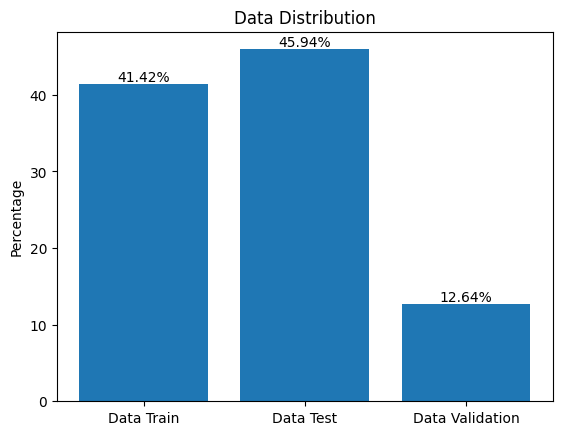

In [33]:
import matplotlib.pyplot as plt

data_lengths = [len(df), len(df1), len(df2)]
labels = ['Data Train', 'Data Test', 'Data Validation']
total_data = sum(data_lengths)
percentages = [(length / total_data) * 100 for length in data_lengths]

plt.bar(labels, percentages)
plt.ylabel('Percentage')
plt.title('Data Distribution')

for i, value in enumerate(percentages):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.show()